# Introduction

The purpose of this project is to put in practice what I learned in Data Wrangling section from Udacity Data Analysis Nano Degree Programme.
For that I performed wrangling of data that I gathered from three different sources.The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

# Data Gathering:

1. The WeRateDogs Twitter archive.I Downloaded this file manually by clicking the following link: twitter_archive_enhanced.csv

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and I downloaded it programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Tweet_json.txt file. Using the tweet IDs in the WeRateDogs Twitter archive,I querried the Twitter API for each tweet's JSON data using Python's Tweepy library and stored each tweet's entire set of JSON data in a file called tweet_json.txt file.Then I loaded .txt file line by  line into a pandas Dataframe with tweet ID , retweet  count , and favorite count.

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json

In [2]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [15]:
#URL downloaded programatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [13]:
#Twitter API And  JSON

In [14]:
## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = 'L1jtL6LQhzKZCJ0vItd8JJA1F'
consumer_secret = 'bEKFOZNfnxkj0IKZPXJbSVrKPu5fFfmYTo0rGI6UXlQQKaQOLB'
access_token = '1283890868907368449-kk42zQeV3u2AYt1EXRXVxklXVkfEem'
access_secret = '11U6T8DOsFM5jmVx1lTEj5XM3f6mklCuTf31SGSJ1xfvf'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



In [220]:

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

NameError: name 'auth' is not defined

In [226]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


NameError: name 'api' is not defined

In [228]:
## Save the retweet and favorite counts for each tweet ID in a new pandas DataFrame
data = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count','retweeted'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        retweeted = status['retweeted']
        data = data.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count,retweeted]],
                                        columns=['tweet_id', 'retweet_count', \
                                                 'favorite_count','retweeted']))
data = data.reset_index(drop=True)
data.head(30)



,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,7597,35858,False
1,892177421306343426,5626,30939,False
2,891815181378084864,3722,23286,False
3,891689557279858688,7773,39130,False
4,891327558926688256,8372,37382,False
5,891087950875897856,2806,18831,False
6,890971913173991426,1828,10938,False
7,890729181411237888,16982,60402,False
8,890609185150312448,3864,25920,False
9,890240255349198849,6612,29602,False


# Assessing Data

## Visual Assessment

We will do visual assessment of all the three data sets that we have gathered.

In [229]:
twitter_archive


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [230]:
data

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,7597,35858,False
1,892177421306343426,5626,30939,False
2,891815181378084864,3722,23286,False
3,891689557279858688,7773,39130,False
4,891327558926688256,8372,37382,False
5,891087950875897856,2806,18831,False
6,890971913173991426,1828,10938,False
7,890729181411237888,16982,60402,False
8,890609185150312448,3864,25920,False
9,890240255349198849,6612,29602,False


In [231]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Programmatic Assessment:

### Twitter_archive

In [232]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [233]:
twitter_archive.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [234]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [235]:
# We can see there are several column where there are more than 50% null entries.
# We will delete that unwanted rows as they are not neede for analysis.
# These column are :' in_reply_to_status_id','in_reply_to_user_id'.
# Also in project details it is given that we only need original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
# So,we will only keep original ratings.

In [236]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [237]:
twitter_archive.retweeted_status_id.count() # There are 181 retweeted_status_id which means there are 181 retweeted ratings .
                                            #So will delete these 181 records and only keep records that have original ratings.

181

In [238]:
twitter_archive.doggo.value_counts() # there are 2259 null entries in doggo column reperesented by 'None'.
                                    # We need to change these entries to 'NaN'


None     2259
doggo      97
Name: doggo, dtype: int64

In [239]:
print(twitter_archive.floofer.value_counts()) # Need to change 'None' entries to 'NaN'.
print(twitter_archive.pupper.value_counts())  # Need to change 'None' entries to 'NaN'.
print(twitter_archive.puppo.value_counts())   # Need to change 'None' entries to 'NaN'.
print(twitter_archive.name.value_counts())    #Need to change 'None' entries to 'NaN'.
# There are lot of  incorrect entries  in the 'name' column that needs to be fixed like 'a','an','the','me',etc.

None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
an           7
Bailey       7
Toby         7
Rusty        6
Scout        6
Milo         6
Jax          6
Stanley      6
Koda         6
Bella        6
Dave         6
Jack         6
Oscar        6
Leo          6
Oakley       5
          ... 
Bobby        1
Huxley       1
Georgie      1
Kulet        1
Crouton      1
Darla        1
Tobi         1
Frönq        1
Buddah       1
Maisey       1
Glenn        1
Diogi        1
Karl         1
Ridley       1
Vinnie       1
Jeb          1
Bobble       1
Ferg         1
Spark        1
Taco         1
Pepper       1
Monkey       1
Gilbert      1
Rambo        1
Ruff

In [240]:
twitter_archive.timestamp # seperate 'timestamp' column into day , month , year columns .

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [241]:
twitter_archive.rating_numerator.value_counts() # There are lot of incorrect numerator ratings which needs to be fixed.(420,80,50,60,165,75,88,144,182,143).



12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [242]:
twitter_archive.rating_denominator.value_counts() # There are lot of entries in rating_denominator column other than 10.

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Image_prediction

In [243]:
image_prediction.info() # all datatypes are correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [244]:
image_prediction.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

In [245]:
image_prediction.jpg_url.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055     True
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Name: jpg_url, Length: 2075, dtype: bool

In [246]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
693,684225744407494656,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,0.203249,True,Samoyed,0.067958,True,Great_Pyrenees,0.065327,True
783,690015576308211712,https://pbs.twimg.com/media/CZNtgWhWkAAbq3W.jpg,2,malamute,0.949609,True,Siberian_husky,0.033084,True,Eskimo_dog,0.016663,True
1019,710140971284037632,https://pbs.twimg.com/media/Cdrtcr-W4AAqi5H.jpg,1,Pekinese,0.953170,True,papillon,0.019517,True,Japanese_spaniel,0.005821,True
251,670704688707301377,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,1,Norwich_terrier,0.419838,True,cairn,0.351876,True,Norfolk_terrier,0.051094,True
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur_coat,0.236391,False,kuvasz,0.038243,True
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False
561,677895101218201600,https://pbs.twimg.com/media/CWhd_7WWsAAaqWG.jpg,1,dalmatian,0.550702,True,kuvasz,0.060226,True,Great_Pyrenees,0.058631,True
1399,768596291618299904,https://pbs.twimg.com/media/CqqaPjqWIAAOyNL.jpg,1,Great_Pyrenees,0.729745,True,golden_retriever,0.237961,True,Labrador_retriever,0.020903,True
658,682389078323662849,https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg,1,curly-coated_retriever,0.482288,True,flat-coated_retriever,0.315286,True,Great_Dane,0.062179,True


In [247]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [248]:
sum(image_prediction.jpg_url.duplicated()) # Drop 66 jpg_url duplicated

66

In [249]:
#Also we will delete the columns that won't be used for analysis.

### tweet_json 

In [250]:
data

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,7597,35858,False
1,892177421306343426,5626,30939,False
2,891815181378084864,3722,23286,False
3,891689557279858688,7773,39130,False
4,891327558926688256,8372,37382,False
5,891087950875897856,2806,18831,False
6,890971913173991426,1828,10938,False
7,890729181411237888,16982,60402,False
8,890609185150312448,3864,25920,False
9,890240255349198849,6612,29602,False


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
tweet_id          2330 non-null object
retweet_count     2330 non-null object
favorite_count    2330 non-null object
retweeted         2330 non-null object
dtypes: object(4)
memory usage: 72.9+ KB


In [252]:
data.retweeted.value_counts()

False    2330
Name: retweeted, dtype: int64

In [253]:
data['retweeted']


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2300    False
2301    False
2302    False
2303    False
2304    False
2305    False
2306    False
2307    False
2308    False
2309    False
2310    False
2311    False
2312    False
2313    False
2314    False
2315    False
2316    False
2317    False
2318    False
2319    False
2320    False
2321    False
2322    False
2323    False
2324    False
2325    False
2326    False
2327    False
2328    False
2329    False
Name: retweeted, Length: 2330, dtype: object

In [254]:
d1 = data[data.retweeted == 'True']
print(d1)

Empty DataFrame
Columns: [tweet_id, retweet_count, favorite_count, retweeted]
Index: []


# Cleaning:

In [255]:
archive_clean = twitter_archive.copy()

In [256]:
img_pred_clean = image_prediction.copy()

In [257]:
json_clean  = data.copy()

## Quality:

Completeness, validity, accuracy, consistency (content issues)

## Twitter_archive_clean 

1. We only need original ratings of dogs that have images and      no retweets. We will delete those entries which have            retweets.
2. Missing data is represented by 'None' istead 'NaN' in 
   Name
   doggo
   floofer
   pupper
   puppo
3. There are many incorrect entries in name column. 
4. Delete unneccessary column which won't be used for analysis.
5. There are lot of incorrect numerator ratings which needs to be fixed.(420,80,50,60,165,75,88,144,182,143).
6. There are lot of entries in rating_dinominaator other than 10 need to be fixed.


## image_prediction
1. Drop 66 jpg_url duplicated
2. Create 1 column for image prediction and 1 column for confidence level
3. Delete columns that won't be used for analysis 

## tweet_json
1. Keep original tweets only

## Tidiness

1. Twitter_archive_clean : Melt doggo,pupper,puppo,floofer into one column.
2. Image_prediction : Change the datatype of tweet_id from object to int to merge dataframes. 


## Twitter_archive_clean 

###  Keep the original rating and delete retweets.

Based on info, there are 181 values in retweeted_status_id and retweeted_status_user_id. Delete the retweets. Once I merge twitter_archive and image_prediction, I will only keep the ones with images.

In [258]:
archive_clean = twitter_archive.copy()

In [259]:
archive_clean.retweeted_status_id.count()

181

#### Code: 

In [260]:
delete_index = archive_clean.query("retweeted_status_id != 'NaN'").index
delete_index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [261]:
archive_clean.drop(labels = delete_index,axis = 0,inplace = True)

#### Test: 

In [262]:
archive_clean.retweeted_status_id.count()

0

In [263]:
#archive_clean.info()
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Missing data is represented by 'None' istead 'NaN' in Name ,doggo ,floofer, pupper ,puppo .

In [264]:
print(archive_clean.name.value_counts())
print(archive_clean.doggo.value_counts())
print(archive_clean.floofer.value_counts())
print(archive_clean.pupper.value_counts())
print(archive_clean.puppo.value_counts())

None       680
a           55
Lucy        11
Charlie     11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Lola         8
Winston      8
the          8
Sadie        8
Toby         7
Daisy        7
Jax          6
Stanley      6
an           6
Bo           6
Oscar        6
Bailey       6
Koda         6
Bella        6
Dave         5
Milo         5
Bentley      5
Scout        5
Buddy        5
Leo          5
Rusty        5
Louis        5
          ... 
Venti        1
Kramer       1
Timmy        1
my           1
Spark        1
Buddah       1
Ferg         1
Bobble       1
Zeek         1
Mauve        1
Meera        1
Brownie      1
Zooey        1
Brat         1
Puff         1
Mac          1
Pumpkin      1
Ulysses      1
Goose        1
Rufio        1
Frönq        1
Maisey       1
Glenn        1
Astrid       1
Diogi        1
Karl         1
Ridley       1
Vinnie       1
Jeb          1
Corey        1
Name: name, Length: 956, dtype: int64
None     2088
doggo      87
Name: doggo, dtype:

#### Code: 

In [265]:
archive_clean.loc[archive_clean['name'] == 'None','name'] = np.nan
archive_clean.loc[archive_clean['doggo'] == 'None','doggo'] = np.nan
archive_clean.loc[archive_clean['floofer'] == 'None','floofer'] = np.nan
archive_clean.loc[archive_clean['pupper'] == 'None','pupper'] = np.nan
archive_clean.loc[archive_clean['puppo'] == 'None','puppo'] = np.nan

#### Test: 

In [266]:
print("Sum of Available None in Name:", archive_clean['name'].str.contains('None').sum())
print("Sum of Available None in doggo:", archive_clean['doggo'].str.contains('None').sum())
print("Sum of Available None in floofer:", archive_clean['floofer'].str.contains('None').sum())
print("Sum of Available None in pupper:", archive_clean['pupper'].str.contains('None').sum())
print("Sum of Available None in puppo:", archive_clean['puppo'].str.contains('None').sum())

Sum of Available None in Name: 0
Sum of Available None in doggo: 0
Sum of Available None in floofer: 0
Sum of Available None in pupper: 0
Sum of Available None in puppo: 0


### Name column has multiple error entries.

In [267]:
archive_clean['name'].value_counts()

a          55
Charlie    11
Lucy       11
Oliver     10
Cooper     10
Penny       9
Tucker      9
Lola        8
the         8
Sadie       8
Winston     8
Toby        7
Daisy       7
Jax         6
Bella       6
Oscar       6
Stanley     6
Bo          6
Koda        6
an          6
Bailey      6
Dave        5
Bentley     5
Scout       5
Milo        5
Leo         5
Chester     5
Rusty       5
Buddy       5
Louis       5
           ..
Kramer      1
Timmy       1
my          1
Brady       1
Pepper      1
Spark       1
Buddah      1
Ferg        1
Mauve       1
Meera       1
Brownie     1
Zooey       1
Brat        1
Puff        1
Mac         1
Pumpkin     1
Ulysses     1
Goose       1
Rufio       1
Frönq       1
Maisey      1
Glenn       1
Astrid      1
Diogi       1
Karl        1
Ridley      1
Vinnie      1
Jeb         1
Bobble      1
Corey       1
Name: name, Length: 955, dtype: int64

In [268]:
name_list = ['a','the','an','just','very','one','quite','not','getting','actually',
             'unacceptable','officially','my','old','this','such','his','light','incredibly','by','life',
             'space','infuriating','all','mad']


In [269]:
archive_clean['name'] = archive_clean['name'].replace(to_replace = name_list,value = 'NaN')

#### Test: 

In [270]:
archive_clean['name'].value_counts()

NaN         104
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Lola          8
Sadie         8
Winston       8
Toby          7
Daisy         7
Oscar         6
Bailey        6
Koda          6
Bo            6
Stanley       6
Jax           6
Bella         6
Leo           5
Scout         5
Louis         5
Rusty         5
Milo          5
Chester       5
Dave          5
Buddy         5
Bentley       5
Brody         4
Dexter        4
           ... 
Tupawc        1
Creg          1
Winifred      1
Blue          1
Rodman        1
Harper        1
Rambo         1
Gilbert       1
Astrid        1
Brat          1
Puff          1
Mac           1
Pumpkin       1
Ulysses       1
Goose         1
Frönq         1
Maisey        1
Glenn         1
Diogi         1
Monkey        1
Karl          1
Ridley        1
Vinnie        1
Jeb           1
Bobble        1
Ferg          1
Buddah        1
Spark         1
Pepper        1
Corey         1
Name: name, Length: 931,

### Seperate Timestamp column into month , day , year  columns.

In [271]:
archive_clean.timestamp.head(500)

0      2017-08-01 16:23:56 +0000
1      2017-08-01 00:17:27 +0000
2      2017-07-31 00:18:03 +0000
3      2017-07-30 15:58:51 +0000
4      2017-07-29 16:00:24 +0000
5      2017-07-29 00:08:17 +0000
6      2017-07-28 16:27:12 +0000
7      2017-07-28 00:22:40 +0000
8      2017-07-27 16:25:51 +0000
9      2017-07-26 15:59:51 +0000
10     2017-07-26 00:31:25 +0000
11     2017-07-25 16:11:53 +0000
12     2017-07-25 01:55:32 +0000
13     2017-07-25 00:10:02 +0000
14     2017-07-24 17:02:04 +0000
15     2017-07-24 00:19:32 +0000
16     2017-07-23 00:22:39 +0000
17     2017-07-22 16:56:37 +0000
18     2017-07-22 00:23:06 +0000
20     2017-07-20 16:49:33 +0000
21     2017-07-19 16:06:48 +0000
22     2017-07-19 03:39:09 +0000
23     2017-07-19 00:47:34 +0000
24     2017-07-18 16:08:03 +0000
25     2017-07-18 00:07:08 +0000
26     2017-07-17 16:17:36 +0000
27     2017-07-16 23:58:41 +0000
28     2017-07-16 20:14:00 +0000
29     2017-07-15 23:25:31 +0000
30     2017-07-15 16:51:35 +0000
          

#### Code 

In [272]:
#archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['timestamp'] = archive_clean['timestamp'].astype('datetime64[ns]')
#extract year, month and day to new columns
#archive_clean['year'] = archive_clean['timestamp'].dt.year
#archive_clean['month'] = archive_clean['timestamp'].dt.month
#archive_clean['day'] = archive_clean['timestamp'].dt.day



In [273]:
#archive_clean.year.value_counts()
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1495 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns](1), float64(4)

In [274]:
archive_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [275]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1495 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns](1), float64(4)

### Delete unneccesaary columns: 

#### Code: 

In [276]:
archive_clean = archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

#### Test:

In [277]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


### There are lot of incorrect numerator ratings which needs to be fixed.(420,80,50,60,165,75,88,144,182,143). 

In [278]:
archive_clean.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [279]:
##Note : I will change datatype from int to float 

In [280]:
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator','rating_denominator']].astype(float)



In [281]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 186.9+ KB


In [282]:
# There are some entries in rating_numerator columns which are just incorrectly printed.
# Code:

In [283]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/Users/devashishguha/Desktop/Monika/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


In [284]:
# I need to correct them manually.

In [285]:
#correction:

In [286]:
archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_clean.loc[(archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26




In [287]:
#Test:

In [288]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/Users/devashishguha/Desktop/Monika/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [289]:
# There are some incorrect numerator entries which will be fixed or deleted in further process.

### There are lot of entries in rating_dinominaator other than 10 need to be fixed. 

#### Code: 

In [290]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0
342,832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0


Note : If we carefully observe above dinominator_rating entries which are other than '10', text shows that either ratings are incorrectly misread or misprinted or represents the rating of multiple dogs together.I am going to correct them manually.
And We will delete those entries which does not foloow above ceiteria.

For the entries in which there are multiple dogs dinominator rating has been represented, we can fix that by  making one seperate column representing resultant of numerator_rating / dinominator_rating.

In [291]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0
342,832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0


In [292]:
archive_clean.loc[(archive_clean.tweet_id == 835246439529840640), 'rating_denominator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
archive_clean.loc[(archive_clean.tweet_id ==  740373189193256964), 'rating_denominator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
archive_clean.loc[(archive_clean.tweet_id ==  682962037429899265), 'rating_denominator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10







In [293]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0


Delete those rows in which numerator_ratings and dinominators_ratings are not clear.

In [294]:
archive_clean = archive_clean[archive_clean['tweet_id'] != 832088576586297345]
archive_clean = archive_clean[archive_clean['tweet_id'] != 810984652412424192]
archive_clean = archive_clean[archive_clean['tweet_id'] != 682808988178739200]

#### Test: 

In [295]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0


In [296]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
#archive_clean['rating'] = 10 * archive_clean['rating_numerator'] / archive_clean['rating_denominator'].astype(float)


## Tidiness: 

### We will  melt doggo,pupper,puppo,floofer into one column.

#### Code: 

In [297]:
archive_floofer = twitter_archive.loc[twitter_archive['floofer'] == 'floofer',:].copy()
archive_pupper = twitter_archive.loc[twitter_archive['pupper'] == 'pupper',:].copy()
archive_puppo = twitter_archive.loc[twitter_archive['puppo'] == 'puppo',:].copy()
archive_doggo = twitter_archive.loc[twitter_archive['doggo'] == 'doggo',:].copy()

In [298]:
print(archive_floofer.shape)
print(archive_pupper.shape)
print(archive_puppo.shape)
print(archive_doggo.shape)

(10, 17)
(257, 17)
(30, 17)
(97, 17)


In [299]:
archive_floofer.drop(labels = ['doggo','pupper','puppo'],axis = 1,inplace = True)
archive_puppo.drop(labels = ['doggo','floofer','pupper'],axis = 1,inplace = True)
archive_pupper.drop(labels = ['doggo','floofer','puppo'],axis = 1,inplace = True)
archive_doggo.drop(labels = ['pupper','floofer','puppo'],axis = 1,inplace = True)

In [300]:
archive_floofer.rename(columns={'floofer':'dog_stage'},inplace = True)
archive_pupper.rename(columns={'pupper':'dog_stage'},inplace = True)
archive_puppo.rename(columns={'puppo':'dog_stage'},inplace = True)
archive_doggo.rename(columns={'doggo':'dog_stage'},inplace = True)

In [301]:
archive_dog_stage = archive_doggo.append([archive_puppo,archive_pupper,archive_floofer])

In [302]:
archive_dog_stage.shape

(394, 14)

In [303]:
archive_dog_stage.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo


In [304]:
archive_dog_stage.index

Int64Index([   9,   43,   99,  108,  110,  121,  172,  191,  200,  211,
            ...
              46,  200,  582,  774,  984, 1022, 1091, 1110, 1534, 1614],
           dtype='int64', length=394)

In [305]:
archive_clean.drop(labels = ['doggo','pupper','puppo','floofer'],axis = 1,inplace = True)

In [306]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name'],
      dtype='object')

In [307]:
# Fill dog_stage column with NaN values
archive_clean['dog_stage'] = np.repeat('NaN',archive_clean.shape[0])

In [308]:
# append both the dataframes
archive_clean = archive_dog_stage.append(archive_clean)

/Users/devashishguha/Desktop/Monika/python/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [309]:
archive_clean.shape

(2566, 14)

In [310]:
list(archive_clean.columns)

['dog_stage',
 'expanded_urls',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'name',
 'rating_denominator',
 'rating_numerator',
 'retweeted_status_id',
 'retweeted_status_timestamp',
 'retweeted_status_user_id',
 'source',
 'text',
 'timestamp',
 'tweet_id']

In [311]:
archive_clean['tweet_id'].duplicated().sum()

358

In [312]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].astype('category')

#### Test: 

In [313]:
archive_clean['dog_stage'].dtypes

CategoricalDtype(categories=['NaN', 'doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

In [314]:
archive_clean.loc[:,['tweet_id','text','dog_stage']].sample(10)

,tweet_id,text,dog_stage
2074,670842764863651840,After so many requests... here you go.\n\nGood...,NaN
1799,677187300187611136,Here we see a Byzantine Rigatoni. Very aerodyn...,NaN
1067,740676976021798912,"Meet Baloo. He's expecting a fast ground ball,...",NaN
1670,682406705142087680,This is Patrick. He's a bigass pupper. 7/10 ht...,NaN
1980,672975131468300288,This is Chuckles. He is one skeptical pupper. ...,pupper
1777,677918531514703872,"""Everything looks pretty good in there. Make s...",NaN
762,778039087836069888,Evolution of a pupper yawn featuring Max. 12/1...,NaN
1679,682032003584274432,This is Ulysses. He likes holding hands and hi...,NaN
449,819004803107983360,This is Bo. He was a very good First Doggo. 14...,NaN
1186,718540630683709445,Get you a pup that can do both. 10/10 https://...,NaN


In [315]:
archive_clean['dog_stage'].value_counts()

NaN        2172
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [316]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566 entries, 9 to 2355
Data columns (total 14 columns):
dog_stage                     2566 non-null category
expanded_urls                 388 non-null object
in_reply_to_status_id         9 non-null float64
in_reply_to_user_id           9 non-null float64
name                          1888 non-null object
rating_denominator            2566 non-null float64
rating_numerator              2566 non-null float64
retweeted_status_id           38 non-null float64
retweeted_status_timestamp    38 non-null object
retweeted_status_user_id      38 non-null float64
source                        394 non-null object
text                          2566 non-null object
timestamp                     2566 non-null object
tweet_id                      2566 non-null int64
dtypes: category(1), float64(6), int64(1), object(6)
memory usage: 283.4+ KB


In [317]:
archive_clean = archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

In [318]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566 entries, 9 to 2355
Data columns (total 7 columns):
dog_stage             2566 non-null category
name                  1888 non-null object
rating_denominator    2566 non-null float64
rating_numerator      2566 non-null float64
text                  2566 non-null object
timestamp             2566 non-null object
tweet_id              2566 non-null int64
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 143.0+ KB


## img_pred_clean 

In [319]:
img_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [320]:
sum(img_pred_clean['jpg_url'].duplicated())

66

### Delete the entries having duplicated jpj_url  

In [321]:
sum(img_pred_clean['jpg_url'].duplicated())

66

###  Code: 

In [322]:
img_pred_clean = img_pred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

### Test:

In [323]:
sum(img_pred_clean['jpg_url'].duplicated())

0

## Tidiness :


###  Create 1 column for image prediction and 1 column for confidence level.



 Create a function where I keep the first true prediction along the confidence level as new columns.

In [324]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(img_pred_clean):
    if img_pred_clean['p1_dog'] == True:
        dog_type.append(img_pred_clean['p1'])
        confidence_list.append(img_pred_clean['p1_conf'])
    elif img_pred_clean['p2_dog'] == True:
        dog_type.append(img_pred_clean['p2'])
        confidence_list.append(img_pred_clean['p2_conf'])
    elif img_pred_clean['p3_dog'] == True:
        dog_type.append(img_pred_clean['p3'])
        confidence_list.append(img_pred_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
img_pred_clean.apply(image, axis=1)

#create new columns
img_pred_clean['dog_type'] = dog_type
img_pred_clean['confidence_list'] = confidence_list

In [325]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id           2009 non-null int64
jpg_url            2009 non-null object
img_num            2009 non-null int64
p1                 2009 non-null object
p1_conf            2009 non-null float64
p1_dog             2009 non-null bool
p2                 2009 non-null object
p2_conf            2009 non-null float64
p2_dog             2009 non-null bool
p3                 2009 non-null object
p3_conf            2009 non-null float64
p3_dog             2009 non-null bool
dog_type           2009 non-null object
confidence_list    2009 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 194.2+ KB


In [326]:
img_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [327]:
#drop rows that has prediction_list 'error'
img_pred_clean = img_pred_clean[img_pred_clean['dog_type'] != 'Error']

#TEST: 
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


### Delete the columns that won't be used for further analysis.

#### CODE: print list of image_prediction columns



In [328]:
print(list(img_pred_clean))



['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


In [329]:
#Delete columns
img_pred_clean = img_pred_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)



#### Test

In [330]:

list(img_pred_clean)

['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

## jason_clean:

### Keep original Rating 

#### Code:

In [331]:
json_clean.head()

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,7597,35858,False
1,892177421306343426,5626,30939,False
2,891815181378084864,3722,23286,False
3,891689557279858688,7773,39130,False
4,891327558926688256,8372,37382,False


In [332]:
json_clean.retweeted.value_counts() # We don't have any retweets in this dataset.

False    2330
Name: retweeted, dtype: int64

## Tidiness: 

In [333]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
tweet_id          2330 non-null object
retweet_count     2330 non-null object
favorite_count    2330 non-null object
retweeted         2330 non-null object
dtypes: object(4)
memory usage: 72.9+ KB


#### Code:  Change the datatype of tweet_id from object to int.

In [334]:
json_clean['tweet_id'] = json_clean['tweet_id'].astype(int)

#### Test: 

In [335]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
tweet_id          2330 non-null int64
retweet_count     2330 non-null object
favorite_count    2330 non-null object
retweeted         2330 non-null object
dtypes: int64(1), object(3)
memory usage: 72.9+ KB


In [336]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566 entries, 9 to 2355
Data columns (total 7 columns):
dog_stage             2566 non-null category
name                  1888 non-null object
rating_denominator    2566 non-null float64
rating_numerator      2566 non-null float64
text                  2566 non-null object
timestamp             2566 non-null object
tweet_id              2566 non-null int64
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 143.0+ KB


# Merge archive_clean , img_pred_clean and jason_clean dataframes together. 

In [337]:
#We will create a new dataframe that merge archive_clean amf img_pred_clean

In [338]:
archive_clean.head(5)

,dog_stage,name,rating_denominator,rating_numerator,text,timestamp,tweet_id
9,doggo,Cassie,10.0,14.0,This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51 +0000,890240255349198849
43,doggo,Yogi,10.0,12.0,Meet Yogi. He doesn't have any important dog m...,2017-07-09 21:29:42 +0000,884162670584377345
99,doggo,None,10.0,12.0,Here's a very large dog. He has a date later. ...,2017-06-09 00:02:31 +0000,872967104147763200
108,doggo,Napolean,10.0,12.0,This is Napolean. He's a Raggedy East Nicaragu...,2017-06-04 23:56:03 +0000,871515927908634625
110,doggo,None,10.0,14.0,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,2017-06-03 20:33:19 +0000,871102520638267392


In [339]:
img_pred_clean.head(5)

,tweet_id,jpg_url,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [340]:
df_twitter = pd.merge(archive_clean , img_pred_clean , how = 'left' , on = ['tweet_id'])

In [341]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566 entries, 0 to 2565
Data columns (total 10 columns):
dog_stage             2566 non-null category
name                  1888 non-null object
rating_denominator    2566 non-null float64
rating_numerator      2566 non-null float64
text                  2566 non-null object
timestamp             2566 non-null object
tweet_id              2566 non-null int64
jpg_url               1896 non-null object
dog_type              1896 non-null object
confidence_list       1896 non-null object
dtypes: category(1), float64(2), int64(1), object(6)
memory usage: 203.2+ KB


In [342]:
# We will keep rows which have pictures.
archive_clean

,dog_stage,name,rating_denominator,rating_numerator,text,timestamp,tweet_id
9,doggo,Cassie,10.0,14.0,This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51 +0000,890240255349198849
43,doggo,Yogi,10.0,12.0,Meet Yogi. He doesn't have any important dog m...,2017-07-09 21:29:42 +0000,884162670584377345
99,doggo,None,10.0,12.0,Here's a very large dog. He has a date later. ...,2017-06-09 00:02:31 +0000,872967104147763200
108,doggo,Napolean,10.0,12.0,This is Napolean. He's a Raggedy East Nicaragu...,2017-06-04 23:56:03 +0000,871515927908634625
110,doggo,None,10.0,14.0,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,2017-06-03 20:33:19 +0000,871102520638267392
121,doggo,Scout,10.0,12.0,This is Scout. He just graduated. Officially a...,2017-05-30 16:49:31 +0000,869596645499047938
172,doggo,None,10.0,13.0,I have stumbled puppon a doggo painting party....,2017-05-01 00:40:27 +0000,858843525470990336
191,doggo,None,10.0,13.0,Here's a puppo participating in the #ScienceMa...,2017-04-22 18:31:02 +0000,855851453814013952
200,doggo,None,10.0,11.0,"At first I thought this was a shy doggo, but i...",2017-04-17 16:34:26 +0000,854010172552949760
211,doggo,Astrid,10.0,13.0,RT @dog_rates: This is Astrid. She's a guide d...,2017-04-12 00:23:33 +0000,851953902622658560


In [343]:
df_twitter = df_twitter[df_twitter['jpg_url'].notnull()]

In [344]:
df_twitter.drop_duplicates(subset = "tweet_id", 
                     keep = 'first', inplace = True) 
df_twitter

,dog_stage,name,rating_denominator,rating_numerator,text,timestamp,tweet_id,jpg_url,dog_type,confidence_list
0,doggo,Cassie,10.0,14.0,This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51 +0000,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319
1,doggo,Yogi,10.0,12.0,Meet Yogi. He doesn't have any important dog m...,2017-07-09 21:29:42 +0000,884162670584377345,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,0.707046
2,doggo,None,10.0,12.0,Here's a very large dog. He has a date later. ...,2017-06-09 00:02:31 +0000,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,Labrador_retriever,0.476913
3,doggo,Napolean,10.0,12.0,This is Napolean. He's a Raggedy East Nicaragu...,2017-06-04 23:56:03 +0000,871515927908634625,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,komondor,0.974781
5,doggo,Scout,10.0,12.0,This is Scout. He just graduated. Officially a...,2017-05-30 16:49:31 +0000,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,Chihuahua,0.955156
6,doggo,None,10.0,13.0,I have stumbled puppon a doggo painting party....,2017-05-01 00:40:27 +0000,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,golden_retriever,0.57812
7,doggo,None,10.0,13.0,Here's a puppo participating in the #ScienceMa...,2017-04-22 18:31:02 +0000,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,flat-coated_retriever,0.321676
8,doggo,None,10.0,11.0,"At first I thought this was a shy doggo, but i...",2017-04-17 16:34:26 +0000,854010172552949760,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,English_springer,0.354733
9,doggo,Astrid,10.0,13.0,RT @dog_rates: This is Astrid. She's a guide d...,2017-04-12 00:23:33 +0000,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,Staffordshire_bullterrier,0.757547
10,doggo,Barney,10.0,13.0,This is Barney. He's an elder doggo. Hitches a...,2017-03-28 00:07:32 +0000,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,golden_retriever,0.650003


In [345]:
df_twitter_head1 = df_twitter.head(5)


In [346]:
df_twitter_head1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 5
Data columns (total 10 columns):
dog_stage             5 non-null category
name                  5 non-null object
rating_denominator    5 non-null float64
rating_numerator      5 non-null float64
text                  5 non-null object
timestamp             5 non-null object
tweet_id              5 non-null int64
jpg_url               5 non-null object
dog_type              5 non-null object
confidence_list       5 non-null object
dtypes: category(1), float64(2), int64(1), object(6)
memory usage: 605.0+ bytes


In [347]:
df_twitter['tweet_id'] = df_twitter.tweet_id.astype('int64')

In [348]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 0 to 2565
Data columns (total 10 columns):
dog_stage             1635 non-null category
name                  1328 non-null object
rating_denominator    1635 non-null float64
rating_numerator      1635 non-null float64
text                  1635 non-null object
timestamp             1635 non-null object
tweet_id              1635 non-null int64
jpg_url               1635 non-null object
dog_type              1635 non-null object
confidence_list       1635 non-null object
dtypes: category(1), float64(2), int64(1), object(6)
memory usage: 129.5+ KB


In [349]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
tweet_id          2330 non-null int64
retweet_count     2330 non-null object
favorite_count    2330 non-null object
retweeted         2330 non-null object
dtypes: int64(1), object(3)
memory usage: 72.9+ KB


In [350]:
Master_df = pd.merge(df_twitter , json_clean , how ='left', on = 'tweet_id')

In [351]:
Master_df.head()
archive_clean.head()

,dog_stage,name,rating_denominator,rating_numerator,text,timestamp,tweet_id
9,doggo,Cassie,10.0,14.0,This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51 +0000,890240255349198849
43,doggo,Yogi,10.0,12.0,Meet Yogi. He doesn't have any important dog m...,2017-07-09 21:29:42 +0000,884162670584377345
99,doggo,None,10.0,12.0,Here's a very large dog. He has a date later. ...,2017-06-09 00:02:31 +0000,872967104147763200
108,doggo,Napolean,10.0,12.0,This is Napolean. He's a Raggedy East Nicaragu...,2017-06-04 23:56:03 +0000,871515927908634625
110,doggo,None,10.0,14.0,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,2017-06-03 20:33:19 +0000,871102520638267392


In [352]:
Backup = Master_df.copy() # I am just making a copy for backup.

In [353]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 0 to 1634
Data columns (total 13 columns):
dog_stage             1635 non-null category
name                  1328 non-null object
rating_denominator    1635 non-null float64
rating_numerator      1635 non-null float64
text                  1635 non-null object
timestamp             1635 non-null object
tweet_id              1635 non-null int64
jpg_url               1635 non-null object
dog_type              1635 non-null object
confidence_list       1635 non-null object
retweet_count         1627 non-null object
favorite_count        1627 non-null object
retweeted             1627 non-null object
dtypes: category(1), float64(2), int64(1), object(9)
memory usage: 167.8+ KB


In [354]:
Master_df['retweet_count'] = Master_df['retweet_count'].fillna(0 )
Master_df['retweet_count'] = Master_df.retweet_count.astype('int64')

In [355]:
Master_df['favorite_count'] = Master_df['favorite_count'].fillna(0 )
Master_df['favorite_count'] = Master_df.favorite_count.astype('int64')

In [356]:
Master_df.describe()

,rating_denominator,rating_numerator,tweet_id,retweet_count,favorite_count
count,1635.000000,1635.000000,1.635000e+03,1635.000000,1635.000000
mean,10.556575,11.423554,7.388613e+17,2273.837920,7842.544954
std,7.049116,8.058749,6.841288e+16,4135.147204,11624.294474
min,10.000000,0.000000,6.660209e+17,0.000000,0.000000
25%,10.000000,10.000000,6.772283e+17,535.000000,1817.500000
50%,10.000000,11.000000,7.113067e+17,1178.000000,3642.000000
75%,10.000000,12.000000,7.932034e+17,2587.500000,9520.500000
max,150.000000,165.000000,8.921774e+17,76741.000000,154532.000000


In [357]:
Master_df.confidence_list.value_counts()

0.873233    2
0.240602    2
0.786089    2
0.245773    1
0.997860    1
0.700182    1
0.750256    1
0.697303    1
0.990060    1
0.864415    1
0.582330    1
0.971358    1
0.408450    1
0.406509    1
0.106003    1
0.469373    1
0.086502    1
0.586307    1
0.329339    1
0.905334    1
0.478193    1
0.990312    1
0.952773    1
0.583875    1
0.632289    1
0.583054    1
0.183283    1
0.224415    1
0.009671    1
0.884839    1
           ..
0.162638    1
0.384559    1
0.600985    1
0.582560    1
0.151113    1
0.334929    1
0.912804    1
0.052695    1
0.956180    1
0.919584    1
0.566142    1
0.958834    1
0.740229    1
0.656463    1
0.269155    1
0.948688    1
0.979803    1
0.862964    1
0.876413    1
0.483682    1
0.089010    1
0.521931    1
0.489814    1
0.709512    1
0.998544    1
0.616457    1
0.372988    1
0.716932    1
0.584026    1
0.213673    1
Name: confidence_list, Length: 1632, dtype: int64

In [387]:
Master_df.head()
Master_df['rating'] = 10 * Master_df['rating_numerator'] / Master_df['rating_denominator'].astype(float)
Master_df['confidence_list'] = Master_df['confidence_list'].astype('float64')
Master_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 0 to 1634
Data columns (total 14 columns):
dog_stage             1635 non-null category
name                  1328 non-null object
rating_denominator    1635 non-null float64
rating_numerator      1635 non-null float64
text                  1635 non-null object
timestamp             1635 non-null datetime64[ns]
tweet_id              1635 non-null int64
jpg_url               1635 non-null object
dog_type              1635 non-null object
confidence_list       1635 non-null float64
retweet_count         1635 non-null int64
favorite_count        1635 non-null int64
retweeted             1627 non-null object
rating                1635 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 180.6+ KB


In [388]:
Master_df.to_csv('twitter_archive_master.csv')

# Download the twitter_archive_master.csv 

In [389]:
from IPython.display import HTML

In [390]:
def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

In [391]:
# create a link to download the dataframe which was saved with .to_csv method

In [392]:
create_download_link(filename='twitter_archive_master.csv')

# Analyse and Visualization:

In [393]:
# We will be working with  Master_df

In [394]:
Master_df.head()

,dog_stage,name,rating_denominator,rating_numerator,text,timestamp,tweet_id,jpg_url,dog_type,confidence_list,retweet_count,favorite_count,retweeted,rating
0,doggo,Cassie,10.0,14.0,This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,6612,29602,False,14.0
1,doggo,Yogi,10.0,12.0,Meet Yogi. He doesn't have any important dog m...,2017-07-09 21:29:42,884162670584377345,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,0.707046,2696,18960,False,12.0
2,doggo,None,10.0,12.0,Here's a very large dog. He has a date later. ...,2017-06-09 00:02:31,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,Labrador_retriever,0.476913,4924,25468,False,12.0
3,doggo,Napolean,10.0,12.0,This is Napolean. He's a Raggedy East Nicaragu...,2017-06-04 23:56:03,871515927908634625,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,komondor,0.974781,3176,18913,False,12.0
4,doggo,Scout,10.0,12.0,This is Scout. He just graduated. Officially a...,2017-05-30 16:49:31,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,Chihuahua,0.955156,2863,15005,False,12.0


In [395]:
Master_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 0 to 1634
Data columns (total 14 columns):
dog_stage             1635 non-null category
name                  1328 non-null object
rating_denominator    1635 non-null float64
rating_numerator      1635 non-null float64
text                  1635 non-null object
timestamp             1635 non-null datetime64[ns]
tweet_id              1635 non-null int64
jpg_url               1635 non-null object
dog_type              1635 non-null object
confidence_list       1635 non-null float64
retweet_count         1635 non-null int64
favorite_count        1635 non-null int64
retweeted             1627 non-null object
rating                1635 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 180.6+ KB


## Exploratory analysis 

In [396]:
Master_df.describe()

,rating_denominator,rating_numerator,tweet_id,confidence_list,retweet_count,favorite_count,rating
count,1635.000000,1635.000000,1.635000e+03,1635.000000,1635.000000,1635.000000,1635.000000
mean,10.556575,11.423554,7.388613e+17,0.550016,2273.837920,7842.544954,10.815602
std,7.049116,8.058749,6.841288e+16,0.299693,4135.147204,11624.294474,1.840867
min,10.000000,0.000000,6.660209e+17,0.000010,0.000000,0.000000,0.000000
25%,10.000000,10.000000,6.772283e+17,0.303098,535.000000,1817.500000,10.000000
50%,10.000000,11.000000,7.113067e+17,0.548907,1178.000000,3642.000000,11.000000
75%,10.000000,12.000000,7.932034e+17,0.822520,2587.500000,9520.500000,12.000000
max,150.000000,165.000000,8.921774e+17,0.999956,76741.000000,154532.000000,27.000000


In [397]:
Master_df.corr() 

,rating_denominator,rating_numerator,tweet_id,confidence_list,retweet_count,favorite_count,rating
rating_denominator,1.000000,0.970501,-0.030901,-0.008455,-0.020878,-0.028937,0.004613
rating_numerator,0.970501,1.000000,0.092292,0.028257,0.047062,0.059526,0.238137
tweet_id,-0.030901,0.092292,1.000000,0.103410,0.384070,0.609989,0.532500
confidence_list,-0.008455,0.028257,0.103410,1.000000,0.027358,0.057418,0.161909
retweet_count,-0.020878,0.047062,0.384070,0.027358,1.000000,0.890661,0.291885
favorite_count,-0.028937,0.059526,0.609989,0.057418,0.890661,1.000000,0.379839
rating,0.004613,0.238137,0.532500,0.161909,0.291885,0.379839,1.000000


# Research Questions:

1. Dog types that have got highest number of retweets / Dog types which are most frequent reported.
2. Dog stages that have got highest number of retweets / Dog stages which are most frequent reported.
3. How the number of tweets varies over the period of time.
4. Which dog stage has got highest rating(mean).
5. Which dog stage has got highest retweet count(mean).
6. Which dog stage has got highest favorite count(mean).
7. Dog types with highest favorite count(mean). 
8. Dog types with highest rating(mean).
9. Dog types with highest retweet count(mean).
10. How favorite count varied over the time.
11. How retweet count caried over the time.


## 1. Dog types that have got highest number of retweets / Dog types which are most frequent reported.


In [398]:
popular_dogtypes = Master_df.groupby('dog_type').count().retweeted.sort_values(ascending=False).head(10)
popular_dogtypes

dog_type
golden_retriever      146
Labrador_retriever    101
Pembroke               94
Chihuahua              88
pug                    60
toy_poodle             49
chow                   45
Pomeranian             42
Samoyed                37
malamute               32
Name: retweeted, dtype: int64

Text(0,0.5,'Retweet count')

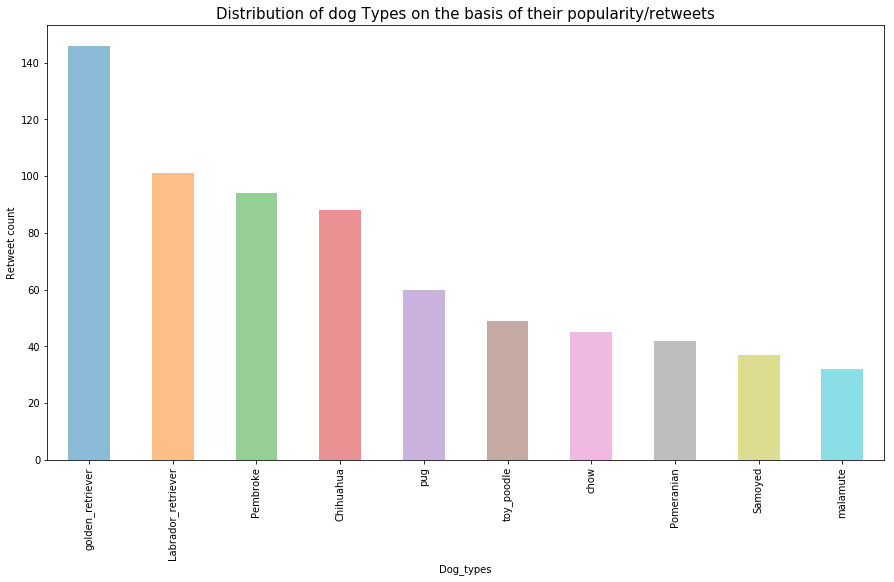

In [399]:
popular_dogtypes.plot(kind='bar', title='count',figsize=(15, 8) ,alpha = 0.5)
plt.title('Distribution of dog Types on the basis of their popularity/retweets', size=15)
plt.xlabel('Dog_types')
plt.ylabel('Retweet count')



### From the above plot we can say that golden_retriever has got highest number of retweets(mean) i.e 146  followed by Labrador_retriever i.e 101.

## Dog stages that have got highest number of retweets / Dog stages which are most frequent reported.

In [400]:
popular_dogstage = Master_df.groupby('dog_stage').count().retweeted.sort_values(ascending=False)
popular_dogstage

dog_stage
NaN        1367
pupper      169
doggo        63
puppo        21
floofer       7
Name: retweeted, dtype: int64

In [401]:
popular_dogstage= popular_dogstage.filter(items = ['pupper','doggo','puppo','floofer'])
popular_dogstage

dog_stage
pupper     169
doggo       63
puppo       21
floofer      7
Name: retweeted, dtype: int64

Text(0,0.5,'Retweet count')

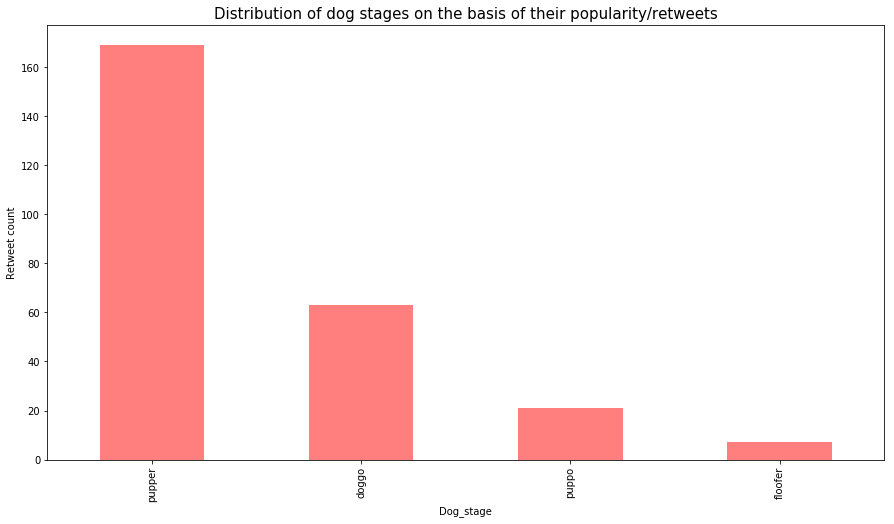

In [402]:
popular_dogstage.plot(kind='bar', title='count',figsize=(15, 8),color= 'red',alpha = 0.5)
plt.title('Distribution of dog stages on the basis of their popularity/retweets', size=15)
plt.xlabel('Dog_stage')
plt.ylabel('Retweet count')

#### As we can observe from the above plot that  pupper is the highly retweeted stage of the dog followed by doggo, puppo and floofer.

In [403]:
Master_df

,dog_stage,name,rating_denominator,rating_numerator,text,timestamp,tweet_id,jpg_url,dog_type,confidence_list,retweet_count,favorite_count,retweeted,rating
0,doggo,Cassie,10.0,14.0,This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,6612,29602,False,14.0
1,doggo,Yogi,10.0,12.0,Meet Yogi. He doesn't have any important dog m...,2017-07-09 21:29:42,884162670584377345,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,0.707046,2696,18960,False,12.0
2,doggo,None,10.0,12.0,Here's a very large dog. He has a date later. ...,2017-06-09 00:02:31,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,Labrador_retriever,0.476913,4924,25468,False,12.0
3,doggo,Napolean,10.0,12.0,This is Napolean. He's a Raggedy East Nicaragu...,2017-06-04 23:56:03,871515927908634625,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,komondor,0.974781,3176,18913,False,12.0
4,doggo,Scout,10.0,12.0,This is Scout. He just graduated. Officially a...,2017-05-30 16:49:31,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,Chihuahua,0.955156,2863,15005,False,12.0
5,doggo,None,10.0,13.0,I have stumbled puppon a doggo painting party....,2017-05-01 00:40:27,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,golden_retriever,0.578120,3268,14892,False,13.0
6,doggo,None,10.0,13.0,Here's a puppo participating in the #ScienceMa...,2017-04-22 18:31:02,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,flat-coated_retriever,0.321676,17178,44101,False,13.0
7,doggo,None,10.0,11.0,"At first I thought this was a shy doggo, but i...",2017-04-17 16:34:26,854010172552949760,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,English_springer,0.354733,3018,15716,False,11.0
8,doggo,Astrid,10.0,13.0,RT @dog_rates: This is Astrid. She's a guide d...,2017-04-12 00:23:33,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,Staffordshire_bullterrier,0.757547,0,0,NaN,13.0
9,doggo,Barney,10.0,13.0,This is Barney. He's an elder doggo. Hitches a...,2017-03-28 00:07:32,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,golden_retriever,0.650003,11237,43786,False,13.0


In [404]:
Master_df['timestamp'] = Master_df['timestamp'].astype('datetime64[ns]')

In [405]:
Split_my = Master_df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

In [406]:
Split_my

2015-11    223
2015-12    282
2016-01    139
2016-02     95
2016-03    105
2016-04     49
2016-05     46
2016-06     66
2016-07     77
2016-08     44
2016-09     52
2016-10     50
2016-11     40
2016-12     49
2017-01     58
2017-02     58
2017-03     44
2017-04     35
2017-05     35
2017-06     42
2017-07     45
2017-08      1
Name: timestamp, dtype: int64

In [407]:
Split_my = pd.DataFrame(Split_my) 

In [408]:
Split_my.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2015-11 to 2017-08
Data columns (total 1 columns):
timestamp    22 non-null int64
dtypes: int64(1)
memory usage: 992.0+ bytes


In [409]:
Split_my.reset_index(level=0, inplace=True)


In [410]:
Split_my.info()
Split_my

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
index        22 non-null object
timestamp    22 non-null int64
dtypes: int64(1), object(1)
memory usage: 432.0+ bytes


,index,timestamp
0,2015-11,223
1,2015-12,282
2,2016-01,139
3,2016-02,95
4,2016-03,105
5,2016-04,49
6,2016-05,46
7,2016-06,66
8,2016-07,77
9,2016-08,44


## 3. How the number of tweets varies over the period of time. 

In [411]:
Split_my['index'] =Split_my['index'].astype('datetime64[ns]')

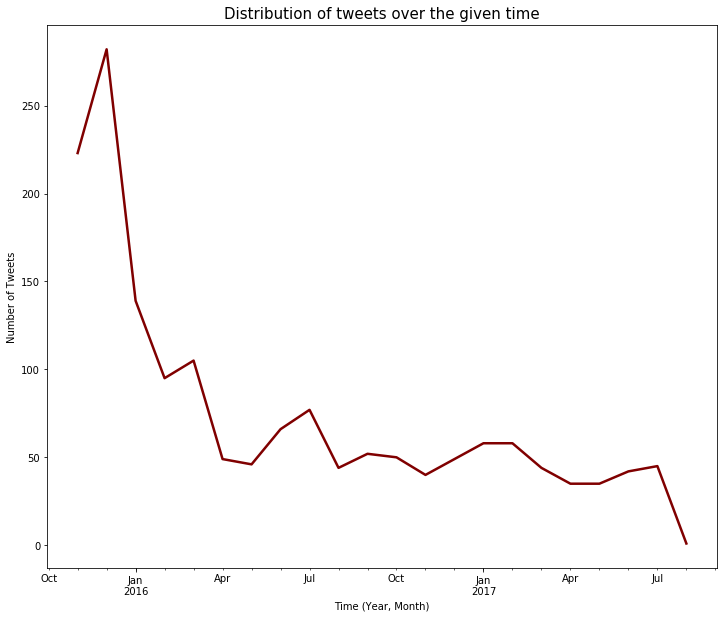

In [412]:
Split_my.set_index('index')['timestamp'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.title('Distribution of tweets over the given time', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('number_of_tweets_over_time');

#### We can see that highest number of tweets  is in Dec 2015(2282) and lowest in Aug 2017(1). 

In [413]:
rating_dogstage = Master_df.groupby(['dog_stage']).mean().rating
rating_dogstage = rating_dogstage.filter(items = ['pupper','doggo','puppo','floofer']) 
rating_dogstage

dog_stage
pupper     10.976331
doggo      11.828125
puppo      11.952381
floofer    12.000000
Name: rating, dtype: float64

## 4. Which dog stage has got highest rating(mean).

Text(0.5,0,'Dog_stages')

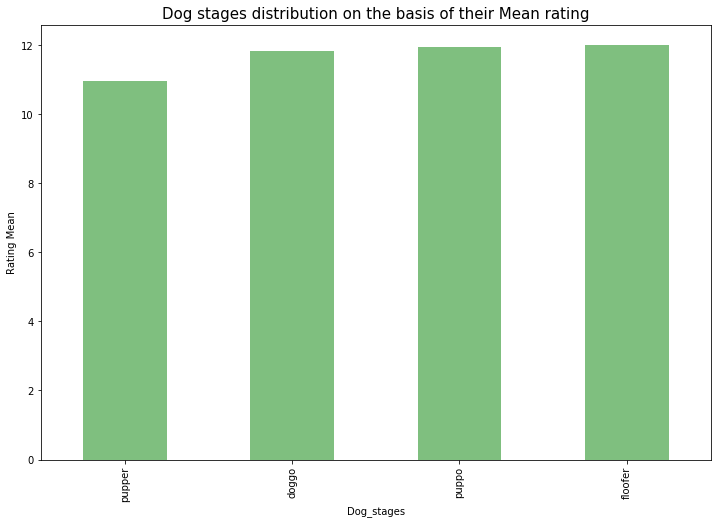

In [414]:
rating_dogstage.plot(kind='bar', title='count',figsize=(12, 8),color= 'green',alpha = 0.5)
#mean rating  of the dog stages
plt.title('Dog stages distribution on the basis of their Mean rating', size =15)
plt.ylabel('Rating Mean')
plt.xlabel('Dog_stages')

### Dog stage which has got highest rating(mean) is floofer(12) followed by puppo(11.9),doggo(11.8) and pupper(10.9). 

##  5. Which dog stage has got highest retweet count(mean).

In [415]:
retweeted_count_dogstage = Master_df.groupby(['dog_stage']).mean().retweet_count
retweeted_count_dogstage = retweeted_count_dogstage.filter(items = ['pupper','doggo','puppo','floofer'])        

In [416]:
retweeted_count_dogstage    

dog_stage
pupper     2102.082840
doggo      6131.578125
puppo      5675.238095
floofer    4301.142857
Name: retweet_count, dtype: float64

Text(0.5,0,'Dog_stages')

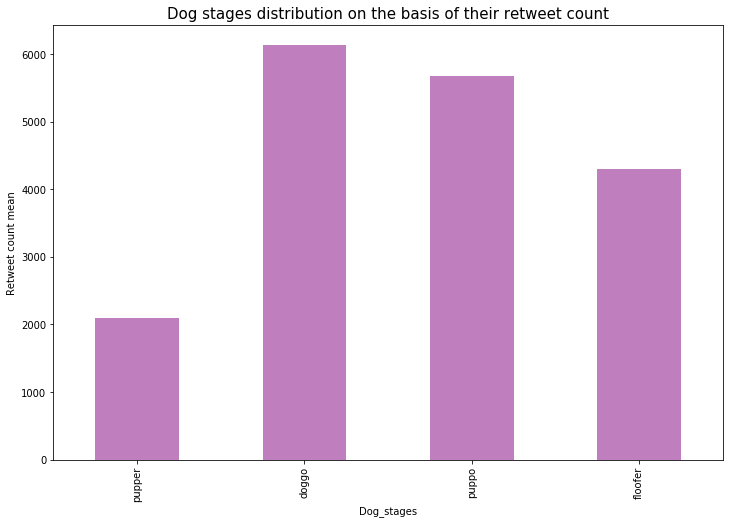

In [417]:
retweeted_count_dogstage.plot(kind='bar', title='count',figsize=(12, 8),color= 'purple',alpha = 0.5)
plt.title('Dog stages distribution on the basis of their retweet count', size =15)
plt.ylabel('Retweet count mean')
plt.xlabel('Dog_stages')

### Dog stages which has got highest retweet count(mean) in doggo(2102.082840) followed by puppo, floofer,pupper. 

##  6. Which dog stage has got highest favorite count(mean).

In [418]:
favorite_count_dogstage = Master_df.groupby(['dog_stage']).mean().favorite_count
favorite_count_dogstage = favorite_count_dogstage.filter(items = ['pupper','doggo','puppo','floofer'])        

In [419]:
favorite_count_dogstage

dog_stage
pupper      6392.964497
doggo      15630.203125
puppo      19906.619048
floofer    11930.428571
Name: favorite_count, dtype: float64

Text(0.5,0,'Dog_stages')

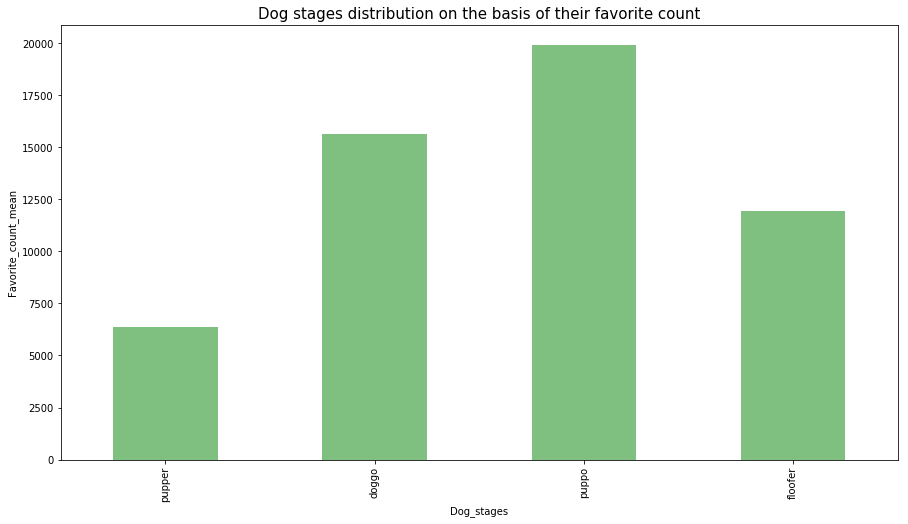

In [420]:
favorite_count_dogstage.plot(kind='bar', title='count',figsize=(15, 8),color= 'green',alpha = 0.5)
plt.title('Dog stages distribution on the basis of their favorite count', size =15)
plt.ylabel('Favorite_count_mean')
plt.xlabel('Dog_stages')

### Dog stages with highest favorite count is puppo (19906.619048)  followed by doggo,floofer,pupper.

## 7. Dog types with highest favorite count(mean).

In [421]:
dogtyp_fav =  Master_df.groupby(['dog_type']).mean().favorite_count.sort_values(ascending=False)

In [422]:
dogtyp_fav = dogtyp_fav.head(20)
dogtyp_fav

dog_type
Bedlington_terrier         22784.333333
Saluki                     22021.000000
French_bulldog             16542.500000
Bouvier_des_Flandres       16314.000000
black-and-tan_coonhound    15518.000000
flat-coated_retriever      15347.375000
Irish_water_spaniel        14842.000000
English_springer           13590.444444
Leonberg                   13458.000000
whippet                    13375.181818
Border_terrier             12355.142857
Mexican_hairless           12324.714286
Eskimo_dog                 11764.590909
Great_Pyrenees             11201.800000
Afghan_hound               11022.000000
Weimaraner                 10875.250000
Lakeland_terrier           10841.588235
Samoyed                    10825.131579
basset                     10695.235294
Cardigan                   10551.263158
Name: favorite_count, dtype: float64

Text(0.5,0,'Dog_types')

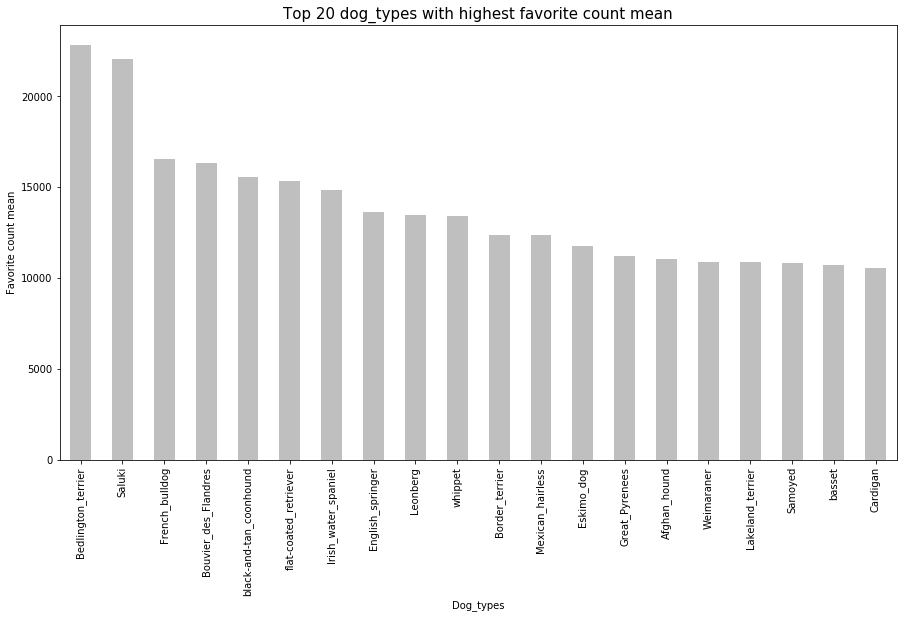

In [423]:
dogtyp_fav.plot(kind='bar', title='count',figsize=(15, 8),color= 'grey',alpha = 0.5)
plt.title('Top 20 dog_types with highest favorite count mean', size =15)
plt.ylabel('Favorite count mean')
plt.xlabel('Dog_types')

###  Dog type with highest favorite count reported is Bedlington Terrier followed by saluki, french_buldog on third position.

## 8. Dog types with highest rating(mean).

In [424]:
dogtyp_rating = Master_df.groupby(['dog_type']).mean().rating.sort_values(ascending=False)

In [425]:
dogtyp_rating = dogtyp_rating.head(20)

Text(0.5,0,'Dog_types')

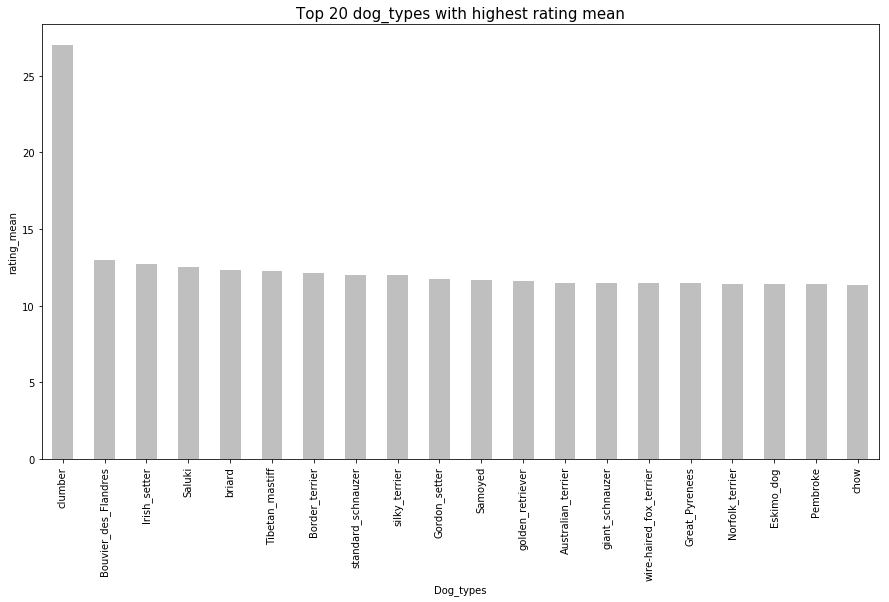

In [426]:
dogtyp_rating.plot(kind='bar', title='count',figsize=(15, 8),color= 'grey',alpha = 0.5)
plt.title('Top 20 dog_types with highest rating mean', size =15)
plt.ylabel('rating_mean')
plt.xlabel('Dog_types')



### Dog type with highest rating reported is Dumber followed by Bouvier des flandres , Irish setter.

## 9. Dog types with highest retweet count(mean). 

In [427]:
dogtyp_ret_count = Master_df.groupby(['dog_type']).mean().retweet_count.sort_values(ascending=False)

In [428]:
dogtyp_ret_count = dogtyp_ret_count.head(20)

Text(0.5,0,'Dog_types')

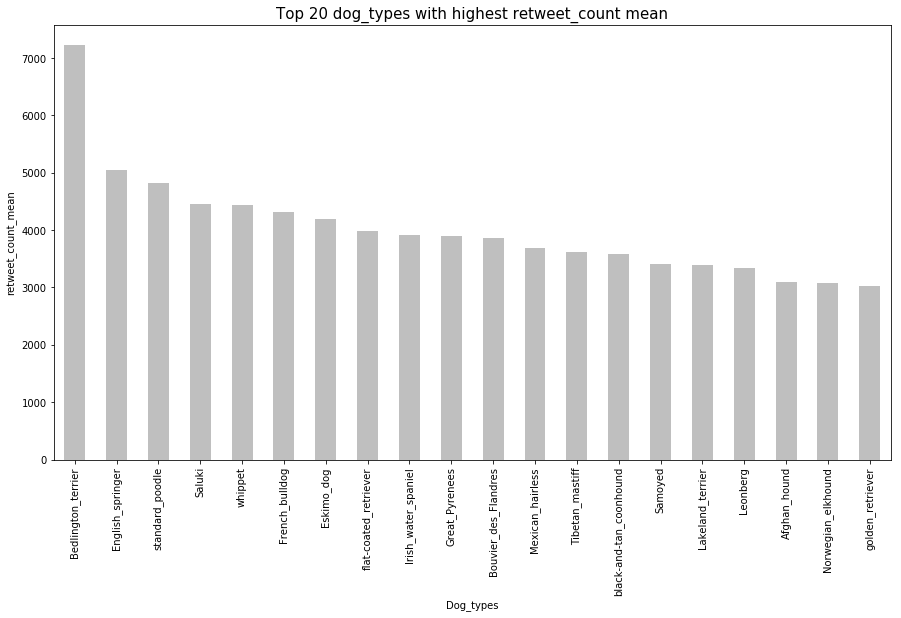

In [429]:
dogtyp_ret_count.plot(kind='bar', title='count',figsize=(15, 8),color= 'grey',alpha = 0.5)
plt.title('Top 20 dog_types with highest retweet_count mean', size =15)
plt.ylabel('retweet_count_mean')
plt.xlabel('Dog_types')



### The dog type with highest retweet count is  bedlington terrier , english springer and standard poodle.

dog_type
clumber                    27.000000
Bouvier_des_Flandres       13.000000
Irish_setter               12.750000
Saluki                     12.500000
briard                     12.333333
Tibetan_mastiff            12.250000
Border_terrier             12.142857
standard_schnauzer         12.000000
silky_terrier              12.000000
Gordon_setter              11.750000
Samoyed                    11.657895
golden_retriever           11.599315
Australian_terrier         11.500000
giant_schnauzer            11.500000
wire-haired_fox_terrier    11.500000
Great_Pyrenees             11.466667
Norfolk_terrier            11.428571
Eskimo_dog                 11.409091
Pembroke                   11.393617
chow                       11.377778
Name: rating, dtype: float64

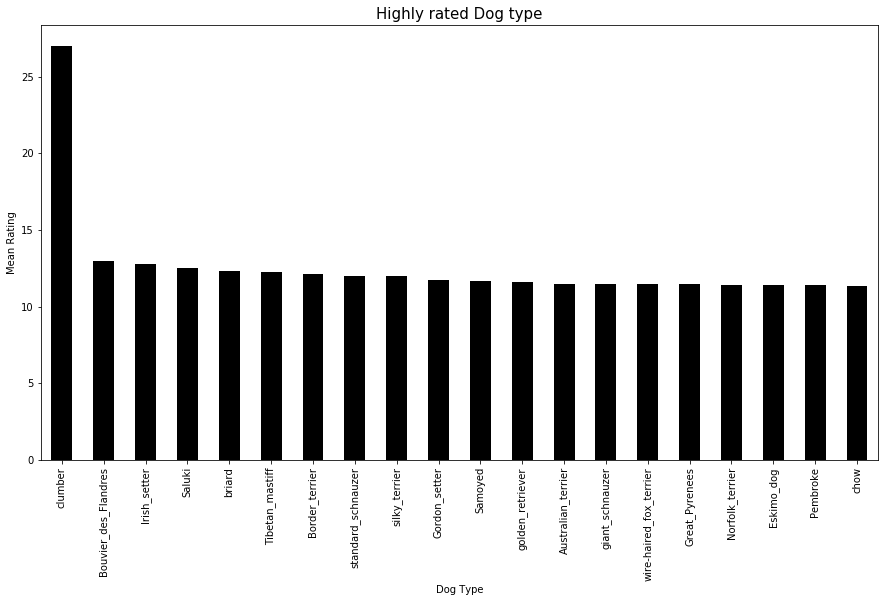

In [430]:
rating_dogstype = Master_df.groupby(['dog_type']).mean().rating.sort_values(ascending = False)
dogtype_rating = rating_dogstype.head(20)
dogtype_rating.plot(kind='bar', title='count',figsize=(15, 8),color= 'black')
plt.title('Highly rated Dog type', size =15)
plt.ylabel('Mean Rating')
plt.xlabel('Dog Type')
dogtype_rating

In [431]:
name_list = Master_df['dog_type'].value_counts()[0:10].index.tolist()
name_list

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'toy_poodle',
 'chow',
 'Pomeranian',
 'Samoyed',
 'malamute']

## 10. How favorite count varied over the time.

Text(0.5,0,'Time (Year, Month)')

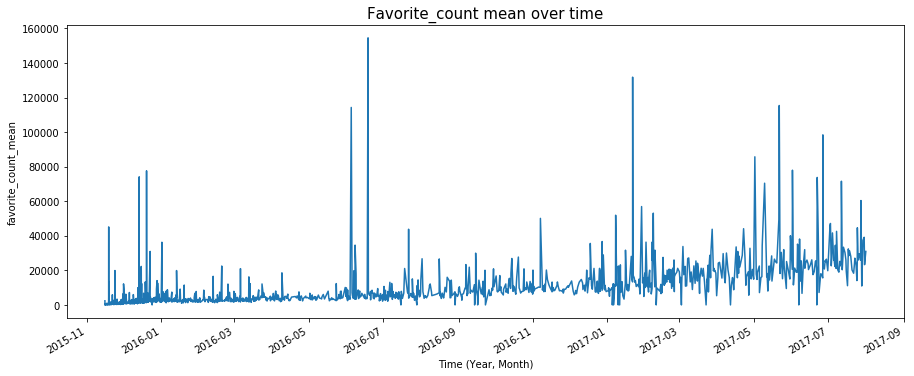

In [432]:
plt.figure(figsize=(15,6))
Master_df.favorite_count.groupby(Master_df['timestamp']).mean().plot('line')
plt.title('Favorite_count mean over time', size =15)
plt.ylabel('favorite_count_mean')
plt.xlabel('Time (Year, Month)')


### From the above plots we can observe that highest peak near  2016-07  . 

## 11. How retweet count caried over the time.
  

Text(0.5,0,'Time (Year, Month)')

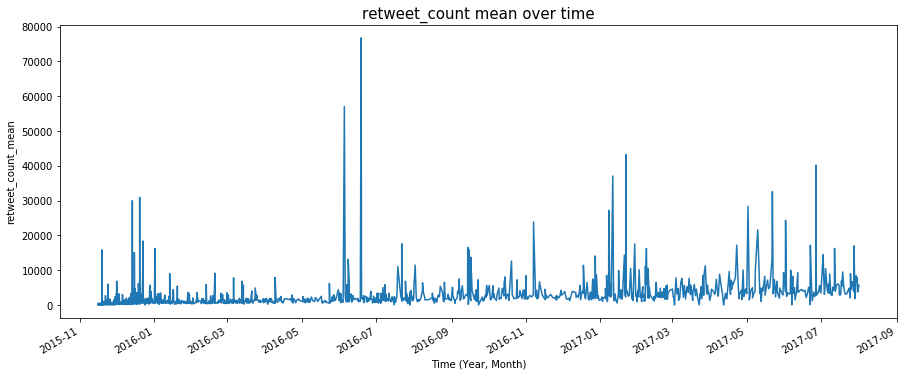

In [433]:
plt.figure(figsize=(15,6))
Master_df.retweet_count.groupby(Master_df['timestamp']).mean().plot('line')
plt.title('retweet_count mean over time', size =15)
plt.ylabel('retweet_count_mean')
plt.xlabel('Time (Year, Month)')


### Highest peek in the retweet trends is somewhere between  July 2016  and September 2016. 

In [434]:
Master_df['year'] = Master_df['timestamp'].dt.year


In [435]:
Master_df.rating.value_counts()

12.00    411
10.00    356
11.00    349
13.00    214
9.00     134
8.00      68
7.00      31
14.00     24
6.00      16
5.00      13
4.00       6
3.00       5
2.00       3
11.26      1
13.50      1
0.00       1
9.75       1
27.00      1
Name: rating, dtype: int64

In [436]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 0 to 1634
Data columns (total 15 columns):
dog_stage             1635 non-null category
name                  1328 non-null object
rating_denominator    1635 non-null float64
rating_numerator      1635 non-null float64
text                  1635 non-null object
timestamp             1635 non-null datetime64[ns]
tweet_id              1635 non-null int64
jpg_url               1635 non-null object
dog_type              1635 non-null object
confidence_list       1635 non-null float64
retweet_count         1635 non-null int64
favorite_count        1635 non-null int64
retweeted             1627 non-null object
rating                1635 non-null float64
year                  1635 non-null int64
dtypes: category(1), datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 273.4+ KB
